In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [ ]:
df = pd.read_csv('horoscope_saved.csv')
df = df.drop(columns='date')
#df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,sign,category,horoscope
0,aries,general,"There's a great day ahead of you, Aries. You'l..."
1,aries,general,People will understand and appreciate your des...
2,aries,general,You are very interested in technological break...
3,aries,general,Stress from overwork could have you feeling we...
4,aries,general,This is a good day to stand up for yourself an...
...,...,...,...
21954,pisces,birthday,Celebrate in style on your birthday in prepara...
21955,pisces,birthday,Imagine your life as if it was exactly the way...
21956,pisces,birthday,"Fun, playfulness, and humor are easy to manife..."
21957,pisces,birthday,"Your birthday brings you a fresh start, as you..."


In [ ]:
#df['date'] = df['date'].dt.date
#df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sign       21959 non-null  object
 1   category   21959 non-null  object
 2   horoscope  21959 non-null  object
dtypes: object(3)
memory usage: 514.8+ KB


In [ ]:
df.describe(include = 'all')

,sign,category,horoscope
count,21959,21959,21959
unique,12,5,12050
top,pisces,love,Be your most charming and persuasive this year...
freq,1830,4392,12


In [ ]:
df.isnull().sum()

sign         0
category     0
horoscope    0
dtype: int64

In [ ]:
df.shape

(21959, 3)

**Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


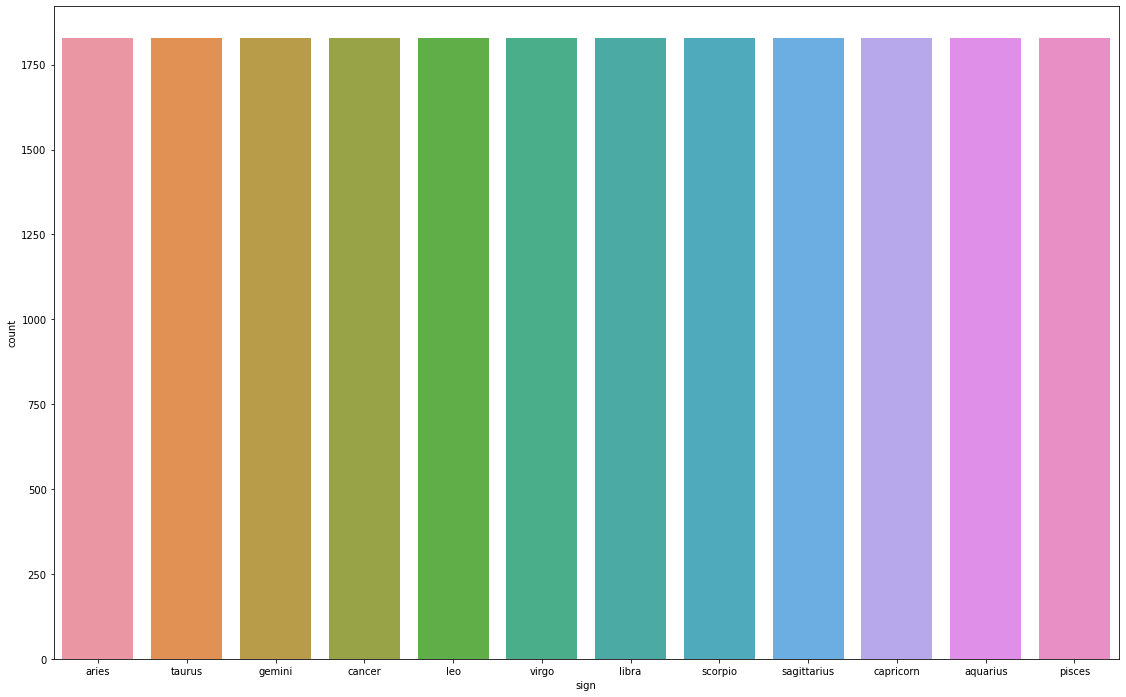

In [ ]:
#Univariated analysis sign

f = plt.figure(figsize=(42,12))
f.add_subplot(1,2,1)
sns.countplot(df['sign'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


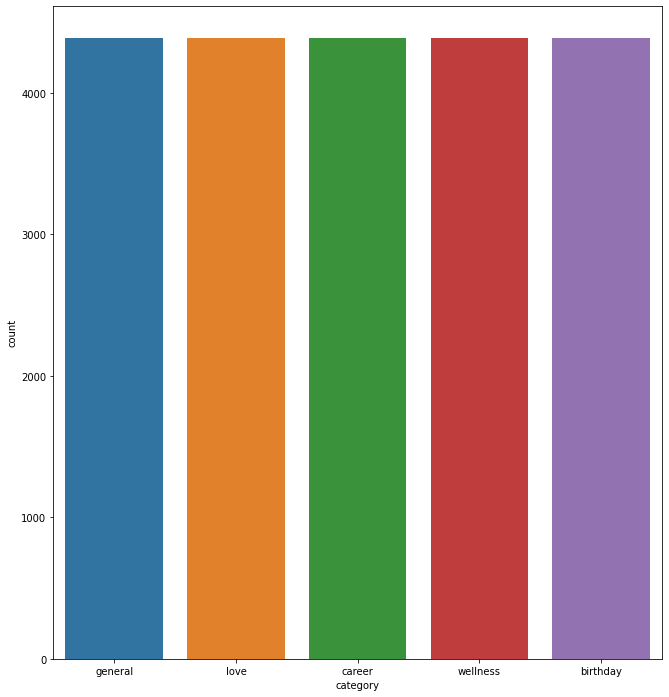

In [ ]:
#Univariated analysis category

f = plt.figure(figsize=(24,12))
f.add_subplot(1,2,1)
sns.countplot(df['category'])
plt.show()

**Data Preperation**

In [ ]:
# convert to lowercase
df['horoscope'] = df['horoscope'].str.lower()

In [ ]:
#from nltk.corpus import stopwords #comment jika Error dan gunakan 2 sintaks dibawah
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['horoscope_stopword'] = df['horoscope'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,sign,category,horoscope,horoscope_stopword
0,aries,general,"there's a great day ahead of you, aries. you'l...","there's great day ahead you, aries. blessed ab..."
1,aries,general,people will understand and appreciate your des...,people understand appreciate desire stand crow...
2,aries,general,you are very interested in technological break...,interested technological breakthroughs innovat...
3,aries,general,stress from overwork could have you feeling we...,stress overwork could feeling weaker usual. mi...
4,aries,general,this is a good day to stand up for yourself an...,"good day stand make known pushover, aries. use..."


In [ ]:
#label encoding

# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['sign']= label_encoder.fit_transform(df['sign']) 
df['category']= label_encoder.fit_transform(df['category'])

df

,sign,category,horoscope,horoscope_stopword
0,1,2,"there's a great day ahead of you, aries. you'l...","there's great day ahead you, aries. blessed ab..."
1,1,2,people will understand and appreciate your des...,people understand appreciate desire stand crow...
2,1,2,you are very interested in technological break...,interested technological breakthroughs innovat...
3,1,2,stress from overwork could have you feeling we...,stress overwork could feeling weaker usual. mi...
4,1,2,this is a good day to stand up for yourself an...,"good day stand make known pushover, aries. use..."
...,...,...,...,...
21954,7,0,celebrate in style on your birthday in prepara...,celebrate style birthday preparation great thi...
21955,7,0,imagine your life as if it was exactly the way...,imagine life exactly way wanted it. birthday y...
21956,7,0,"fun, playfulness, and humor are easy to manife...","fun, playfulness, humor easy manifest year bir..."
21957,7,0,"your birthday brings you a fresh start, as you...","birthday brings fresh start, clear away cobweb..."


In [ ]:
#one-hot-encoding

sign = pd.get_dummies(df.sign)
category = pd.get_dummies(df.category)
new_df = pd.concat([df, sign, category], axis=1) #, category
new_df = new_df.drop(columns='sign')
new_df = new_df.drop(columns='category')
new_df

In [ ]:
#one-hot-encoding 2

sign = pd.get_dummies(df.sign)
category = pd.get_dummies(df.category)
new_df = pd.concat([df, sign], axis=1) #, category
new_df = new_df.drop(columns='sign')
new_df

In [ ]:
horo = new_df['horoscope'].values
labels = new_df[['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo', 'birthday', 'career', 'general', 'love', 'wellness']].values #, 'birthday', 'career', 'general', 'love', 'wellness'

In [ ]:
horo = new_df['horoscope'].values
labels = new_df[['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo']].values #, 'birthday', 'career', 'general', 'love', 'wellness'

In [ ]:
horo = df['horoscope_stopword'].values
labels = df[['sign', 'category']].values

In [ ]:
#memisahkan data training dan validasi (data validasi hanya terdiri 20% dari total dataset)
horo_latih, horo_test, labels_latih, labels_test = train_test_split(horo, labels, test_size=0.2)

In [ ]:
#fungsi tokenizer
#filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(horo_latih)
tokenizer.fit_on_texts(horo_test)
 
sekuens_latih = tokenizer.texts_to_sequences(horo_latih)
sekuens_test = tokenizer.texts_to_sequences(horo_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

**Modeling**

In [ ]:
#implementasi callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and 
       logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#Arsitektur model machine learning dengan menggunakan embedding dan LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=13000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          416000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               82432     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 506,818
Trainable params: 506,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiler
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(padded_latih, labels_latih, epochs=num_epochs, 
                    validation_data=(padded_test, labels_test), verbose=2, callbacks=[callbacks])

Epoch 1/10
549/549 - 59s - loss: 129.7870 - accuracy: 0.8317 - val_loss: 274.2305 - val_accuracy: 0.8333 - 59s/epoch - 107ms/step
Epoch 2/10
549/549 - 56s - loss: 416.5130 - accuracy: 0.8334 - val_loss: 562.8824 - val_accuracy: 0.8333 - 56s/epoch - 101ms/step
Epoch 3/10
549/549 - 56s - loss: 686.4218 - accuracy: 0.8334 - val_loss: 804.7842 - val_accuracy: 0.8333 - 56s/epoch - 102ms/step
Epoch 4/10
549/549 - 56s - loss: 922.9142 - accuracy: 0.8334 - val_loss: 1038.4265 - val_accuracy: 0.8333 - 56s/epoch - 103ms/step
Epoch 5/10
549/549 - 56s - loss: 1150.6116 - accuracy: 0.8334 - val_loss: 1211.8596 - val_accuracy: 0.8333 - 56s/epoch - 102ms/step
Epoch 6/10
549/549 - 57s - loss: 1298.7444 - accuracy: 0.8334 - val_loss: 1508.0471 - val_accuracy: 0.8333 - 57s/epoch - 103ms/step
Epoch 7/10
549/549 - 57s - loss: 1538.7921 - accuracy: 0.8334 - val_loss: 1709.3674 - val_accuracy: 0.8333 - 57s/epoch - 103ms/step
Epoch 8/10
549/549 - 58s - loss: 1788.1711 - accuracy: 0.8334 - val_loss: 1868.7513

In [ ]:
model.save("machinelearning.h5")

Save Model to TFjs

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.2 MB/s 


In [ ]:
saved_model_path = '/content/mymodel/'
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: /content/mymodel/assets


INFO:tensorflow:Assets written to: /content/mymodel/assets


In [ ]:
!tensorflowjs_converter \
  --input_format=tf_saved_model \
  /content/mymodel/ \
  /content/modeltfjs

2021-12-20 11:44:42.993898: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Writing weight file /content/modeltfjs/model.json...
